# Assignment 1 (20 marks)

Letter Image Recognition

In this assignment you are given a large number of black-and-white rectangular pixel displays. You will use neural networks (MLP) and KNN in order to predict which of the 26 capital letters in the English alphabet each such display represents.

### A: Source Information

Creator: David J. Slate Odesta Corporation; 1890 Maple Ave; Suite 115; Evanston, IL 60201  
Donor: David J. Slate (dave@math.nwu.edu) (708) 491-3867  
Date: January, 1991  


### B: Relevant Information

The character images is based on 20 different fonts and each letter within these 20 fonts has been randomly distorted to produce a file of 20,000 unique stimuli.  Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15. We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000 (**NOT in this assignment**). See the article cited below for more details: 

P. W. Frey and D. J. Slate (Machine Learning Vol 6 #2 March 91): "Letter Recognition Using Holland-style Adaptive Classifiers".

### C:Attribute Information

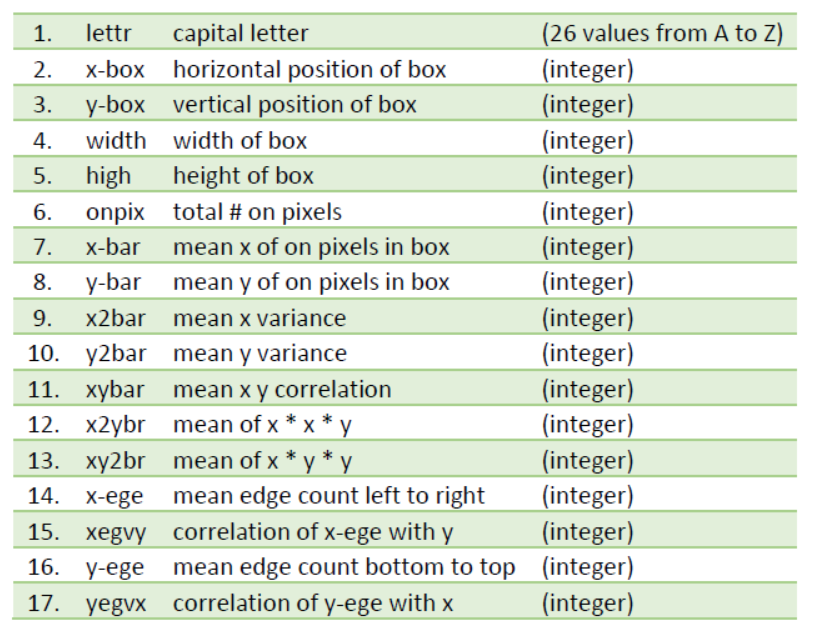

In [33]:
from IPython.display import Image
Image(filename='Att_Letter.png',width = "600",height = "300")

**Note**: In the above table, the class label is the **'lettr'** (No.1), following by the 16 numerical attributes (Nos. 2-17).

The following code uses Python's `csv` module to load the data and prints the first row and the total number of rows.

In [3]:
import sklearn
import csv

In [10]:
with open('Letter.csv') as f:
    reader = csv.reader(f)
    print("Header line: %s" % next(reader))
    annotated_data = [r for r in reader]
print(annotated_data[0])
print("Total number of rows:", len(annotated_data))

Header line: ['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']
['T', '2', '8', '3', '5', '1', '8', '13', '0', '6', '6', '10', '8', '0', '8', '0', '8']
Total number of rows: 20000


In [5]:
Header=['lettr', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar', 'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

## Exercise 1 (1 mark) - Class Distribution
Compute and print the percentage and its number of stimuli corresponding to the five letters A-E (class label lettr).

* A: ?
* B: ?
* C: ?
* D: ?
* E: ?

In [11]:
#print(annotated_data[0])

#Counters used to store values of A, B, C, D & E.

countA = 0
countB = 0
countC = 0
countD = 0
countE = 0

#A for loop used to iterate through the whole annotated_data list.
#Since annotated_data is a two-dimensional list, i[0] is used.
#It is a list of lists.
#Each row is stored as a list within one index.
#In this way we can sift through the column containing the letters.

for i in annotated_data:
    if i[0] == 'A':
        countA = countA + 1
    if i[0] == 'B':
        countB = countB + 1
    if i[0] == 'C':
        countC = countC + 1
    if i[0] == 'D':
        countD = countD + 1
    if i[0] == 'E':
        countE = countE + 1

#Printing all the counter values.
#Dividing by 20,000 because there are 20,000 data points given in the CSV File.
#This was found by using the function 'len(annotated_data)'.

print("Count and Percentages of letters A, B, C, D and E:")
print("A:",countA,",",round((countA/20000)*100,2),"%")
print("B:",countB,",",round((countB/20000)*100,2),"%")
print("C:",countC,",",round((countC/20000)*100,2),"%")
print("D:",countD,",",round((countD/20000)*100,2),"%")
print("E:",countE,",",round((countE/20000)*100,2),"%")

Count and Percentages of letters A, B, C, D and E:
A: 789 , 3.94 %
B: 766 , 3.83 %
C: 736 , 3.68 %
D: 805 , 4.03 %
E: 768 , 3.84 %


## Exercise 2 (1 mark) - Split the data for training and testing purpose.
Split the data into a training set, a dev-test set, and a test set. Use the following ratio for splitting the data:

* Training set: 80%
* Dev-test set: 10%
* Test set: 10%

In [12]:
import random  
random.seed(1234)  
random.shuffle(annotated_data)

The above three lines of code are used to randomize the order of the data.  
After that, you need to use the first 80% as training set, then 10% as Dev-test (this part will not be used from exercise 4), and the last 10% as test set.

In [13]:
import numpy
import sklearn.model_selection

#Two lists are there to store the data points.

inputData = []
theLetters = []

#The ACTUAL letters need to be separated from the other values.
#Since the letters are in essence our 'desired outputs'.
#All other data in the CSV File is treated as 'inputs'.
#My understanding is that we are trying to use the 'inputs' to find answer that is as close as possible to the 'desired outputs'.

#The values from the CSV File are converted into a List of Lists containing String values.

#Thus we use index 0 for 'theLetters'.
#This way we only make a new list containing all the letters.
#As I indexed through these Strings, I changed them all to their ASCII values.
#Similarly we store all the other details that exist from index 1 onwards in the 'inputData' list.
#As I indexed through these values, I converted all these String values into integers.

for row in annotated_data:
    theLetters.append(ord(row[0]))
    values = []
    for indValue in row[1:]:
        values.append(int(indValue))
    inputData.append(values)

    
#I am splitting the input data into 80%, 10% and 10%
inputData_train = inputData[:16000]
inputData_test = inputData[16000:18000]
inputData_dev = inputData[18000:]

#I am splitting the output data into 80%, 10% and 10%
theLetters_train = theLetters[:16000]
theLetters_test = theLetters[16000:18000]
theLetters_dev = theLetters[18000:]

#inputData_train, inputData_test, theLetters_train, theLetters_test = sklearn.model_selection.train_test_split(inputData, theLetters, test_size = 0.2, random_state = 0)
#inputData_test, inputData_dev, theLetters_test, theLetters_dev = sklearn.model_selection.train_test_split(inputData_test, theLetters_test, test_size = 0.5, random_state = 0)

#print(len(inputData_train))
#print(len(inputData_dev))
#print(len(inputData_test))

#print(inputData_train[:10])
#print(theLetters_train[:10])

## Exercise 3 (1 mark) - Check that the data are balanced
Print the percentage of class label lettr (A-E) in each partition, and check that they are similar.

Training set:  

In [14]:
#Counters used to store values of A, B, C, D & E.
count_A = 0
count_B = 0
count_C = 0
count_D = 0
count_E = 0

#A for loop used to iterate through the whole annotated_data list.
#Since annotated_data is a two-dimensional list, i[0] is used.
#It is a list of lists.
#Each row is stored as a list within one index.
#In this way we can sift through the column containing the letters.
for i in theLetters_train:
    if i == ord('A'):
        count_A = count_A + 1
    if i == ord('B'):
        count_B = count_B + 1
    if i == ord('C'):
        count_C = count_C + 1
    if i == ord('D'):
        count_D = count_D + 1
    if i == ord('E'):
        count_E = count_E + 1

print("Count and Percentages of Training Set:")
print("A:",count_A,",",round((count_A/len(theLetters_train))*100,2),"%")
print("B:",count_B,",",round((count_B/len(theLetters_train))*100,2),"%")
print("C:",count_C,",",round((count_C/len(theLetters_train))*100,2),"%")
print("D:",count_D,",",round((count_D/len(theLetters_train))*100,2),"%")
print("E:",count_E,",",round((count_E/len(theLetters_train))*100,2),"%")

Count and Percentages of Training Set:
A: 630 , 3.94 %
B: 601 , 3.76 %
C: 577 , 3.61 %
D: 652 , 4.08 %
E: 621 , 3.88 %


Dev-test set:

In [15]:
#Counters used to store values of A, B, C, D & E.
#I overwrite previously stored values, because they are just placeholders.
count_A = 0
count_B = 0
count_C = 0
count_D = 0
count_E = 0

#A for loop used to iterate through the whole annotated_data list.
#Since annotated_data is a two-dimensional list, i[0] is used.
#It is a list of lists.
#Each row is stored as a list within one index.
#In this way we can sift through the column containing the letters.
for i in theLetters_dev:
    if i == ord('A'):
        count_A = count_A + 1
    if i == ord('B'):
        count_B = count_B + 1
    if i == ord('C'):
        count_C = count_C + 1
    if i == ord('D'):
        count_D = count_D + 1
    if i == ord('E'):
        count_E = count_E + 1

print("Count and Percentages of Dev-test Set:")
print("A:",count_A,",",round((count_A/len(theLetters_dev))*100,2),"%")
print("B:",count_B,",",round((count_B/len(theLetters_dev))*100,2),"%")
print("C:",count_C,",",round((count_C/len(theLetters_dev))*100,2),"%")
print("D:",count_D,",",round((count_D/len(theLetters_dev))*100,2),"%")
print("E:",count_E,",",round((count_E/len(theLetters_dev))*100,2),"%")

Count and Percentages of Dev-test Set:
A: 84 , 4.2 %
B: 75 , 3.75 %
C: 83 , 4.15 %
D: 84 , 4.2 %
E: 63 , 3.15 %


Test set:

In [16]:
#Counters used to store values of A, B, C, D & E.
#I overwrite previously stored values, because they are just placeholders.
count_A = 0
count_B = 0
count_C = 0
count_D = 0
count_E = 0

#A for loop used to iterate through the whole annotated_data list.
#Since annotated_data is a two-dimensional list, i[0] is used.
#It is a list of lists.
#Each row is stored as a list within one index.
#In this way we can sift through the column containing the letters.
for i in theLetters_test:
    if i == ord('A'):
        count_A = count_A + 1
    if i == ord('B'):
        count_B = count_B + 1
    if i == ord('C'):
        count_C = count_C + 1
    if i == ord('D'):
        count_D = count_D + 1
    if i == ord('E'):
        count_E = count_E + 1

print("Count and Percentages of Test Set:")
print("A:",count_A,",",round((count_A/len(theLetters_test))*100,2),"%")
print("B:",count_B,",",round((count_B/len(theLetters_test))*100,2),"%")
print("C:",count_C,",",round((count_C/len(theLetters_test))*100,2),"%")
print("D:",count_D,",",round((count_D/len(theLetters_test))*100,2),"%")
print("E:",count_E,",",round((count_E/len(theLetters_test))*100,2),"%")

Count and Percentages of Test Set:
A: 75 , 3.75 %
B: 90 , 4.5 %
C: 76 , 3.8 %
D: 69 , 3.45 %
E: 84 , 4.2 %


## Exercise 4 (3 marks) - Training and Testing of Data using MLPClassifier
Train an `sklearn` MLPClassifier with default settings (random_state=0) using the training set, and report the accuracy on the training and test set respectively.

In [17]:
import sklearn.neural_network
from sklearn import metrics

#Using default setting for MLPClassifier() function.
#Using the .fit() function to map the input 'Training' data to the expected 'Trainng' output.
MLP = sklearn.neural_network.MLPClassifier(random_state = 0)
MLP.fit(inputData_train, theLetters_train)

#Using the .predict() function of MLP Classifier to generate an output dataset from 'Training Input Data'.
theLetters_train_prediction = MLP.predict(inputData_train)
print("Train Accuracy: ", round(metrics.accuracy_score(theLetters_train, theLetters_train_prediction)*100,2),"%")
#Using the .predict() function of MLP Classifier to generate an output dataset from 'Testing Input Data'.
theLetters_test_prediction = MLP.predict(inputData_test)
print("Test Accuracy: ", round(metrics.accuracy_score(theLetters_test, theLetters_test_prediction)*100,2),"%")

Train Accuracy:  94.87 %
Test Accuracy:  92.35 %


c:\users\arman chowdhury\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Exercise 5 (8 marks) - Scaling, Training and Testing of Data using MLPClassifier
Neural networks expect all input features to vary in a way, and ideally to have a mean of 0, and a variance of 1.
Please refer to the **Standardization** (https://en.wikipedia.org/wiki/Feature_scaling) for attribute scaling. 

### 5.1 compute the mean value per feature  (except for the class lable) in the training set [1 mark]

In [18]:
import numpy

#Using the built-in mean function.
inputData_train_mean = numpy.mean(inputData_train, axis = 0)
#print(inputData_train_mean)

### 5.2 compute the standard deviation of each feature  (except for the class lable) in the training set [1 mark]

In [19]:
#Using the built-in standard deviation function.
inputData_train_std = numpy.std(inputData_train, axis = 0)
#print(inputData_train_std)

### 5.3 [Scaling the training set] subtract the mean, and scale by inverse standard deviation.  [1 mark]

In [20]:
inputData_train_scaled = []

#Using the formula, Output = (Input - mean(Input)) / Standard Deviation(Input).
for row in inputData_train:
    inputData_train_scaled.append((row - inputData_train_mean)/inputData_train_std)

#print(inputData_train_scaled[:10])

### 5.4 Do the same (using training mean and std) with respect to the test set [1 mark]


In [21]:
inputData_test_mean = numpy.mean(inputData_test, axis = 0)
#print(inputData_test_mean)

inputData_test_std = numpy.std(inputData_test, axis = 0)
#print(inputData_test_std)

inputData_test_scaled = []

for row in inputData_test:
    inputData_test_scaled.append((row - inputData_test_mean)/inputData_test_std)

#print(inputData_test_scaled[:1])

### 5.5 Train an `sklearn` MLPClassifier with default settings (random_state=0) using the scaled training set and report the accuracy on the scaled training and scaled test set.  [2 marks]

In [22]:
#Using default setting for MLPClassifier() function.
#Using the .fit() function to map the input 'Scaled Training' data to the expected 'Training' output.
MLP = sklearn.neural_network.MLPClassifier(random_state = 0)
MLP.fit(inputData_train_scaled, theLetters_train)

#Using the .predict() function of MLP Classifier to generate an output dataset from 'Scaled Training Input Data'.
theLetters_train_scaled_prediction = MLP.predict(inputData_train_scaled)
print("Train Accuracy: ", round(metrics.accuracy_score(theLetters_train, theLetters_train_scaled_prediction)*100,2),"%")

#Using the .predict() function of MLP Classifier to generate an output dataset from 'Scaled Testing Input Data'.
theLetters_test_scaled_prediction = MLP.predict(inputData_test_scaled)
print("Test Accuracy: ", round(metrics.accuracy_score(theLetters_test, theLetters_test_scaled_prediction)*100,2),"%")

Train Accuracy:  99.05 %
Test Accuracy:  95.6 %


c:\users\arman chowdhury\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


### 5.6 Increase the number of iterations of MLP in Task 5.5 to see whether the optimization has been converged. [2 marks]

In [23]:
#Using default setting for MLPClassifier() function with 'max_iter' set to 1000.
#Using the .fit() function to map the input 'Scaled Training' data to the expected 'Training' output.
MLP = sklearn.neural_network.MLPClassifier(random_state = 0, max_iter = 1000)
MLP.fit(inputData_train_scaled, theLetters_train)

#Using the .predict() function of MLP Classifier to generate an output dataset from 'Scaled Trainng Input Data'.
theLetters_train_scaled_prediction = MLP.predict(inputData_train_scaled)
print("Train Accuracy: ", round(metrics.accuracy_score(theLetters_train, theLetters_train_scaled_prediction)*100,2),"%")

#Using the .predict() function of MLP Classifier to generate an output dataset from 'Scaled Testing Input Data'.
theLetters_test_scaled_prediction = MLP.predict(inputData_test_scaled)
print("Test Accuracy: ", round(metrics.accuracy_score(theLetters_test, theLetters_test_scaled_prediction)*100,2),"%")


Train Accuracy:  99.7 %
Test Accuracy:  95.7 %


## Exercise 6 (2 marks)-KNN with different k values
Train KNN models with different k values (1-10), and then report the best accuracy and its k value on unscaled training/test and scaled  training/test data, respectively.

### 6.1 Report the best accuracy and its k value on unscaled training/test
print("Training-index:",training_accuracy.index(max(training_accuracy)), "Value:", max(training_accuracy))  
print("Test-index:",test_accuracy.index(max(test_accuracy)), "Value:", max(test_accuracy))

In [24]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []

#Using the KNN Classifier function with default settings.
#I varied the 'n_neighbors' from 1 to 11.
#Used the .fit() function to map the 'Training' input data to the 'Training' output data.
#Used the .predict() function to generate outputs based on 'Training' input data.
#Used the .predict() function to generate outputs based on 'Testing' input data.
for i in range (1, 11):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(inputData_train, theLetters_train)
    training_accuracy.append((metrics.accuracy_score(theLetters_train, knn.predict(inputData_train)))*100)
    test_accuracy.append((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test)))*100)

print("Training-index:",training_accuracy.index(max(training_accuracy)), "Value:", max(training_accuracy))
print("Test-index:",test_accuracy.index(max(test_accuracy)), "Value:", max(test_accuracy))

Training-index: 0 Value: 100.0
Test-index: 0 Value: 95.5


### 6.2 Report the best accuracy and its k value on scaled training/test
print("Training_scaled-index:",training_scaled_accuracy.index(max(training_scaled_accuracy)), "Value:", max(training_scaled_accuracy))  
print("Test_scaled-index:",test_scaled_accuracy.index(max(test_scaled_accuracy)), "Value:", max(test_scaled_accuracy))

In [25]:
training_scaled_accuracy = []
test_scaled_accuracy = []

#Using the KNN Classifier function with default settings.
#I varied the 'n_neighbors' from 1 to 11.
#Used the .fit() function to map the 'Scaled Training' input data to the 'Scaled Training' output data.
#Used the .predict() function to generate outputs based on 'Scaled Training' input data.
#Used the .predict() function to generate outputs based on 'Scaled Testing' input data.
for i in range (1, 11):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(inputData_train_scaled, theLetters_train)
    training_scaled_accuracy.append((metrics.accuracy_score(theLetters_train, knn.predict(inputData_train_scaled)))*100)
    test_scaled_accuracy.append((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test_scaled)))*100)
    
print("Training_scaled-index:",training_scaled_accuracy.index(max(training_scaled_accuracy)), "Value:", max(training_scaled_accuracy))  
print("Test_scaled-index:",test_scaled_accuracy.index(max(test_scaled_accuracy)), "Value:", max(test_scaled_accuracy))

Training_scaled-index: 0 Value: 100.0
Test_scaled-index: 0 Value: 94.5


## Exercise 7 (4 marks) - Analysis of Results
Analyse the results of all the classifiers from the previous exercises, and answer the following questions. In all answers you must include any code (experiments) that you need to implement in order to answer the questions, the output of the code, and an interpretation of the output that shows how it can be used to answer the relevant questions. 

### 7.1 (1 mark) Did you observe any overfitting in any of the classifiers? How did you determine whether they have any overfitting? 

Your results

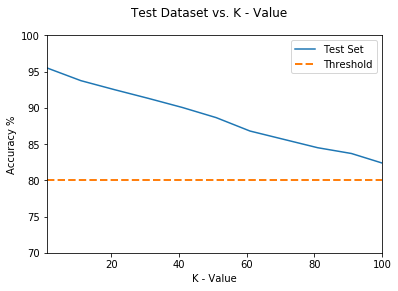

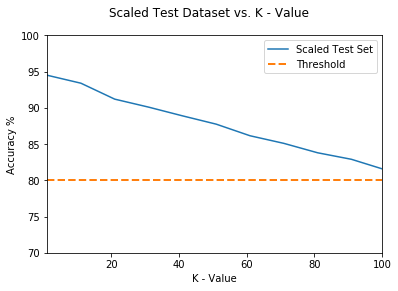

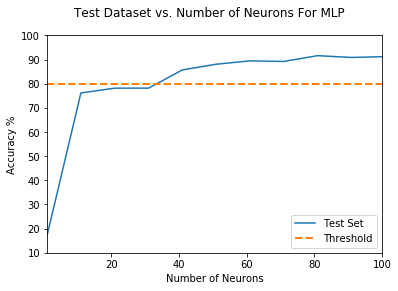

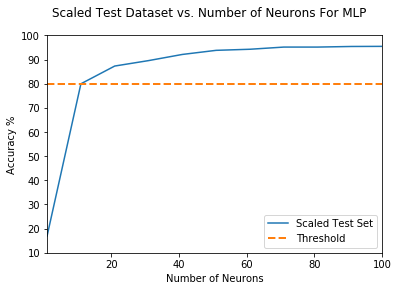

In [27]:
import matplotlib
import matplotlib.pyplot as plt

test_accuracy = []
test_scaled_accuracy = []
x = numpy.arange(1, 102, 10)

#KNN CLASSIFIER
for i in range (1, 102, 10):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(inputData_train, theLetters_train)
    test_accuracy.append((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test)))*100)

#Plotting the Test Data.
plt.figure(1).suptitle('Test Dataset vs. K - Value')
plt.xlabel('K - Value')
plt.ylabel('Accuracy %')
plt.xlim(1, 100)
plt.ylim(70, 100)
plt.plot(x, test_accuracy, label = 'Test Set')
#Setting 80% Accuracy as the Threshold
plt.plot([1, 101], [80, 80], '--', linewidth = 2, label = 'Threshold')
plt.legend()

for i in range (1, 102, 10):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(inputData_train_scaled, theLetters_train)
    test_scaled_accuracy.append((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test_scaled)))*100)

#Plotting the Scaled Test Data.
plt.figure(2).suptitle('Scaled Test Dataset vs. K - Value')
plt.xlabel('K - Value')
plt.ylabel('Accuracy %')
plt.xlim(1, 100)
plt.ylim(70, 100)
plt.plot(x, test_scaled_accuracy, label = 'Scaled Test Set')
#Setting 80% Accuracy as the Threshold
plt.plot([1, 101], [80, 80], '--', linewidth = 2, label = 'Threshold')
plt.legend()


#MLP CLASSIFIER
test_accuracy_MLP = []
test_scaled_accuracy_MLP = []
xMLP = numpy.arange(1, 102, 10)

#Changing the variable 'hidden_layer_sizes'.
#'hidden_layer_sizes' is a tuple = (number of neurons in layer 1, number of neurons in layer 2, ... and so on).
for i in range(1, 102, 10):
    MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (i,), random_state = 0, max_iter = 1000)
    MLP.fit(inputData_train, theLetters_train)
    test_accuracy_MLP.append((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test)))*100)

#Plotting the Test Data.
plt.figure(3).suptitle('Test Dataset vs. Number of Neurons For MLP')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy %')
plt.xlim(1, 100)
plt.ylim(10, 100)
plt.plot(xMLP, test_accuracy_MLP, label = 'Test Set')
#Setting 80% Accuracy as the Threshold
plt.plot([1, 101], [80, 80], '--', linewidth = 2, label = 'Threshold')
plt.legend(loc = 'lower right')

test_accuracy_MLP = []
test_scaled_accuracy_MLP = []
xMLP = numpy.arange(1, 102, 10)

#Changing the variable 'hidden_layer_sizes'.
#'hidden_layer_sizes' is a tuple = (number of neurons in layer 1, number of neurons in layer 2, ... and so on).
for i in range(1, 102, 10):
    MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (i,), random_state = 0, max_iter = 1000)
    MLP.fit(inputData_train_scaled, theLetters_train)
    test_scaled_accuracy_MLP.append((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test_scaled)))*100)

#Plotting the Scaled Test Data.
plt.figure(4).suptitle('Scaled Test Dataset vs. Number of Neurons For MLP')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy %')
plt.xlim(1, 100)
plt.ylim(10, 100)
plt.plot(xMLP, test_scaled_accuracy_MLP, label = 'Scaled Test Set')
#Setting 80% Accuracy as the Threshold
plt.plot([1, 101], [80, 80], '--', linewidth = 2, label = 'Threshold')
plt.legend(loc = 'lower right')

plt.show()

#################################################################################################################################
#I have set the Accuracy threshold to be 80%
#I have plotted the Accuracy of the Test Dataset and the Scaled Test Dataset
#For the KNN Classifier I have chosen K-Values ranging from 1 to 101, in steps of 10.
#For the MLP Classifier I have chosen Number of Neurons from 1 to 101, in steps of 10.

#A downward sloping trend can be seen as we increase the number of neighbors for the KNN Classifier method.
#According to the above parameters, the model trained using KNN method isn't overfitting.
#This is because the accuracy scores do not fall below the 'set threshold'.

#An upward sloping trend, with an asymtote can be observed for the accuracy scores for the MLP method.
#According to the above parameters, the model trained using the MLP method is overfitting.
#This is because the accuracy scores fall below the 'set threshold'.

#The plots below show our findings in greater detail.

### Answer 7.1:
I have set the Accuracy threshold to be 80%
I have plotted the Accuracy of the Test Dataset and the Scaled Test Dataset
For the KNN Classifier I have chosen K-Values ranging from 1 to 101, in steps of 10.
For the MLP Classifier I have chosen Number of Neurons from 1 to 101, in steps of 10.

A downward sloping trend can be seen as we increase the number of neighbors for the KNN Classifier method.
According to the above parameters, the model trained using KNN method isn't overfitting.
This is because the accuracy scores do not fall below the 'set threshold'.

An upward sloping trend, with an asymtote can be observed for the accuracy scores for the MLP method.
According to the above parameters, the model trained using the MLP method is overfitting.
This is because the accuracy scores fall below the 'set threshold'.

So, using the MLP Classifier method we can state that trainnig data was insufficient in predicting data that would have an accuracy score above 80%. Thus, we could say that the trained model was overfitting for the test data that was used on it.

The plots above show my findings in greater detail.

### 7.2 (3 mark) Do we have too little training data, or do we have too much training data for these classifiers?

Your results

Method:  Train-%/Test-%:  Dataset-Type:  Value:
KNN 10/90 Test Accuracy:  [79.16]
KNN 10/90 Scaled Test Accuracy:  [79.14]
MLP 10/90 Test Accuracy:  [78.31]
MLP 10/90 Scaled Test Accuracy:  [86.18]
KNN 20/80 Test Accuracy:  [87.32]
KNN 20/80 Scaled Test Accuracy:  [86.9]
MLP 20/80 Test Accuracy:  [81.24]
MLP 20/80 Scaled Test Accuracy:  [90.49]
KNN 30/70 Test Accuracy:  [90.43]
KNN 30/70 Scaled Test Accuracy:  [89.94]
MLP 30/70 Test Accuracy:  [87.03]
MLP 30/70 Scaled Test Accuracy:  [92.48]
KNN 40/60 Test Accuracy:  [91.82]
KNN 40/60 Scaled Test Accuracy:  [91.16]
MLP 40/60 Test Accuracy:  [86.81]
MLP 40/60 Scaled Test Accuracy:  [93.48]
KNN 50/50 Test Accuracy:  [93.41]
KNN 50/50 Scaled Test Accuracy:  [92.94]
MLP 50/50 Test Accuracy:  [88.75]
MLP 50/50 Scaled Test Accuracy:  [94.36]
KNN 60/40 Test Accuracy:  [94.14]
KNN 60/40 Scaled Test Accuracy:  [93.71]
MLP 60/40 Test Accuracy:  [90.12]
MLP 60/40 Scaled Test Accuracy:  [95.15]
KNN 70/30 Test Accuracy:  [94.85]
KNN 70/30 Scaled Te

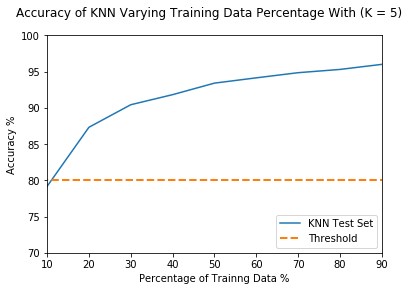

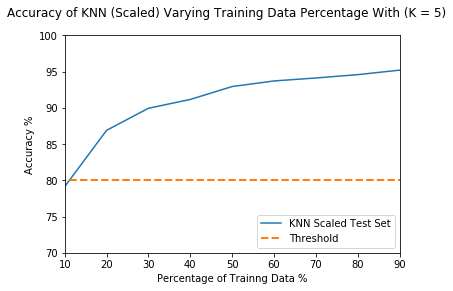

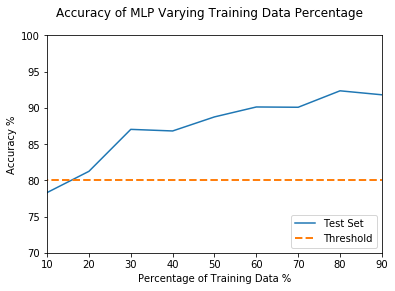

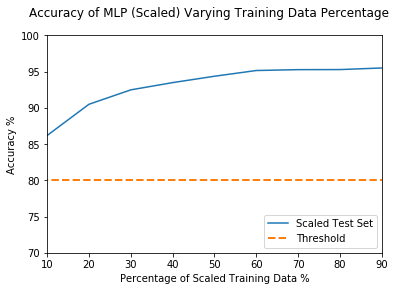

In [30]:
#Used to store data for plotting.
final_test_accuracy_KNN = []
final_scaled_test_accuracy_KNN = []
final_test_accuracy_MLP = []
final_scaled_test_accuracy_MLP = []
trainingDataPercentage = []
print("Method:  Train-%/Test-%:  Dataset-Type:  Value:")

#################################################################################################################################
## !!!!!
#I am splitting the input data into 10%, 90%
#!!!!!
inputData_train = inputData[:2000]
inputData_test = inputData[2000:]
theLetters_train = theLetters[:2000]
theLetters_test = theLetters[2000:]

trainingDataPercentage.append(10)

#Data Set
test_accuracy_KNN = []
test_accuracy_MLP = []

#Scaled Data Set
test_scaled_accuracy_KNN = []
test_scaled_accuracy_MLP = []

#Scaling Data Sets
inputData_train_scaled = []
inputData_test_scaled = []

inputData_train_mean = numpy.mean(inputData_train, axis = 0)
inputData_train_std = numpy.std(inputData_train, axis = 0)
for row in inputData_train:
    inputData_train_scaled.append((row - inputData_train_mean)/inputData_train_std)

inputData_test_mean = numpy.mean(inputData_test, axis = 0)
inputData_test_std = numpy.std(inputData_test, axis = 0)
for row in inputData_test:
    inputData_test_scaled.append((row - inputData_test_mean)/inputData_test_std)    

#KNN Classifier
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train, theLetters_train)
test_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test)))*100, 2))
print("KNN 10/90 Test Accuracy: ", test_accuracy_KNN)
final_test_accuracy_KNN.append(test_accuracy_KNN)

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test_scaled)))*100, 2))
print("KNN 10/90 Scaled Test Accuracy: ", test_scaled_accuracy_KNN)
final_scaled_test_accuracy_KNN.append(test_scaled_accuracy_KNN)

#MLP Classifier
MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train, theLetters_train)
test_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test)))*100, 2))
print("MLP 10/90 Test Accuracy: ", test_accuracy_MLP)
final_test_accuracy_MLP.append(test_accuracy_MLP)

MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test_scaled)))*100, 2))
print("MLP 10/90 Scaled Test Accuracy: ", test_scaled_accuracy_MLP)
final_scaled_test_accuracy_MLP.append(test_scaled_accuracy_MLP)

#################################################################################################################################
## !!!!!
#I am splitting the input data into 20%, 80%
#!!!!!
inputData_train = inputData[:4000]
inputData_test = inputData[4000:]
theLetters_train = theLetters[:4000]
theLetters_test = theLetters[4000:]

trainingDataPercentage.append(20)

#Data Set
test_accuracy_KNN = []
test_accuracy_MLP = []

#Scaled Data Set
test_scaled_accuracy_KNN = []
test_scaled_accuracy_MLP = []

#Scaling Data Sets
inputData_train_scaled = []
inputData_test_scaled = []

inputData_train_mean = numpy.mean(inputData_train, axis = 0)
inputData_train_std = numpy.std(inputData_train, axis = 0)
for row in inputData_train:
    inputData_train_scaled.append((row - inputData_train_mean)/inputData_train_std)

inputData_test_mean = numpy.mean(inputData_test, axis = 0)
inputData_test_std = numpy.std(inputData_test, axis = 0)
for row in inputData_test:
    inputData_test_scaled.append((row - inputData_test_mean)/inputData_test_std)    

#KNN Classifier
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train, theLetters_train)
test_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test)))*100, 2))
print("KNN 20/80 Test Accuracy: ", test_accuracy_KNN)
final_test_accuracy_KNN.append(test_accuracy_KNN)

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test_scaled)))*100, 2))
print("KNN 20/80 Scaled Test Accuracy: ", test_scaled_accuracy_KNN)
final_scaled_test_accuracy_KNN.append(test_scaled_accuracy_KNN)

#MLP Classifier
MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train, theLetters_train)
test_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test)))*100, 2))
print("MLP 20/80 Test Accuracy: ", test_accuracy_MLP)
final_test_accuracy_MLP.append(test_accuracy_MLP)

MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test_scaled)))*100, 2))
print("MLP 20/80 Scaled Test Accuracy: ", test_scaled_accuracy_MLP)
final_scaled_test_accuracy_MLP.append(test_scaled_accuracy_MLP)

#################################################################################################################################
## !!!!!
#I am splitting the input data into 30%, 70%
#!!!!!
inputData_train = inputData[:6000]
inputData_test = inputData[6000:]
theLetters_train = theLetters[:6000]
theLetters_test = theLetters[6000:]

trainingDataPercentage.append(30)

#Data Set
test_accuracy_KNN = []
test_accuracy_MLP = []

#Scaled Data Set
test_scaled_accuracy_KNN = []
test_scaled_accuracy_MLP = []

#Scaling Data Sets
inputData_train_scaled = []
inputData_test_scaled = []

inputData_train_mean = numpy.mean(inputData_train, axis = 0)
inputData_train_std = numpy.std(inputData_train, axis = 0)
for row in inputData_train:
    inputData_train_scaled.append((row - inputData_train_mean)/inputData_train_std)

inputData_test_mean = numpy.mean(inputData_test, axis = 0)
inputData_test_std = numpy.std(inputData_test, axis = 0)
for row in inputData_test:
    inputData_test_scaled.append((row - inputData_test_mean)/inputData_test_std)    

#KNN Classifier
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train, theLetters_train)
test_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test)))*100, 2))
print("KNN 30/70 Test Accuracy: ", test_accuracy_KNN)
final_test_accuracy_KNN.append(test_accuracy_KNN)

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test_scaled)))*100, 2))
print("KNN 30/70 Scaled Test Accuracy: ", test_scaled_accuracy_KNN)
final_scaled_test_accuracy_KNN.append(test_scaled_accuracy_KNN)

#MLP Classifier
MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train, theLetters_train)
test_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test)))*100, 2))
print("MLP 30/70 Test Accuracy: ", test_accuracy_MLP)
final_test_accuracy_MLP.append(test_accuracy_MLP)

MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test_scaled)))*100, 2))
print("MLP 30/70 Scaled Test Accuracy: ", test_scaled_accuracy_MLP)
final_scaled_test_accuracy_MLP.append(test_scaled_accuracy_MLP)

#################################################################################################################################
## !!!!!
#I am splitting the input data into 40%, 60%
#!!!!!
inputData_train = inputData[:8000]
inputData_test = inputData[8000:]
theLetters_train = theLetters[:8000]
theLetters_test = theLetters[8000:]

trainingDataPercentage.append(40)

#Data Set
test_accuracy_KNN = []
test_accuracy_MLP = []

#Scaled Data Set
test_scaled_accuracy_KNN = []
test_scaled_accuracy_MLP = []

#Scaling Data Sets
inputData_train_scaled = []
inputData_test_scaled = []

inputData_train_mean = numpy.mean(inputData_train, axis = 0)
inputData_train_std = numpy.std(inputData_train, axis = 0)
for row in inputData_train:
    inputData_train_scaled.append((row - inputData_train_mean)/inputData_train_std)

inputData_test_mean = numpy.mean(inputData_test, axis = 0)
inputData_test_std = numpy.std(inputData_test, axis = 0)
for row in inputData_test:
    inputData_test_scaled.append((row - inputData_test_mean)/inputData_test_std)    

#KNN Classifier
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train, theLetters_train)
test_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test)))*100, 2))
print("KNN 40/60 Test Accuracy: ", test_accuracy_KNN)
final_test_accuracy_KNN.append(test_accuracy_KNN)

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test_scaled)))*100, 2))
print("KNN 40/60 Scaled Test Accuracy: ", test_scaled_accuracy_KNN)
final_scaled_test_accuracy_KNN.append(test_scaled_accuracy_KNN)

#MLP Classifier
MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train, theLetters_train)
test_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test)))*100, 2))
print("MLP 40/60 Test Accuracy: ", test_accuracy_MLP)
final_test_accuracy_MLP.append(test_accuracy_MLP)

MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test_scaled)))*100, 2))
print("MLP 40/60 Scaled Test Accuracy: ", test_scaled_accuracy_MLP)
final_scaled_test_accuracy_MLP.append(test_scaled_accuracy_MLP)

#################################################################################################################################
## !!!!!
#I am splitting the input data into 50%, 50%
#!!!!!
inputData_train = inputData[:10000]
inputData_test = inputData[10000:]
theLetters_train = theLetters[:10000]
theLetters_test = theLetters[10000:]

trainingDataPercentage.append(50)

#Data Set
test_accuracy_KNN = []
test_accuracy_MLP = []

#Scaled Data Set
test_scaled_accuracy_KNN = []
test_scaled_accuracy_MLP = []

#Scaling Data Sets
inputData_train_scaled = []
inputData_test_scaled = []

inputData_train_mean = numpy.mean(inputData_train, axis = 0)
inputData_train_std = numpy.std(inputData_train, axis = 0)
for row in inputData_train:
    inputData_train_scaled.append((row - inputData_train_mean)/inputData_train_std)

inputData_test_mean = numpy.mean(inputData_test, axis = 0)
inputData_test_std = numpy.std(inputData_test, axis = 0)
for row in inputData_test:
    inputData_test_scaled.append((row - inputData_test_mean)/inputData_test_std)    

#KNN Classifier
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train, theLetters_train)
test_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test)))*100, 2))
print("KNN 50/50 Test Accuracy: ", test_accuracy_KNN)
final_test_accuracy_KNN.append(test_accuracy_KNN)

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test_scaled)))*100, 2))
print("KNN 50/50 Scaled Test Accuracy: ", test_scaled_accuracy_KNN)
final_scaled_test_accuracy_KNN.append(test_scaled_accuracy_KNN)

#MLP Classifier
MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train, theLetters_train)
test_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test)))*100, 2))
print("MLP 50/50 Test Accuracy: ", test_accuracy_MLP)
final_test_accuracy_MLP.append(test_accuracy_MLP)

MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test_scaled)))*100, 2))
print("MLP 50/50 Scaled Test Accuracy: ", test_scaled_accuracy_MLP)
final_scaled_test_accuracy_MLP.append(test_scaled_accuracy_MLP)

#################################################################################################################################
## !!!!!
#I am splitting the input data into 60%, 40%
#!!!!!
inputData_train = inputData[:12000]
inputData_test = inputData[12000:]
theLetters_train = theLetters[:12000]
theLetters_test = theLetters[12000:]

trainingDataPercentage.append(60)

#Data Set
test_accuracy_KNN = []
test_accuracy_MLP = []

#Scaled Data Set
test_scaled_accuracy_KNN = []
test_scaled_accuracy_MLP = []

#Scaling Data Sets
inputData_train_scaled = []
inputData_test_scaled = []

inputData_train_mean = numpy.mean(inputData_train, axis = 0)
inputData_train_std = numpy.std(inputData_train, axis = 0)
for row in inputData_train:
    inputData_train_scaled.append((row - inputData_train_mean)/inputData_train_std)

inputData_test_mean = numpy.mean(inputData_test, axis = 0)
inputData_test_std = numpy.std(inputData_test, axis = 0)
for row in inputData_test:
    inputData_test_scaled.append((row - inputData_test_mean)/inputData_test_std)    

#KNN Classifier
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train, theLetters_train)
test_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test)))*100, 2))
print("KNN 60/40 Test Accuracy: ", test_accuracy_KNN)
final_test_accuracy_KNN.append(test_accuracy_KNN)

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test_scaled)))*100, 2))
print("KNN 60/40 Scaled Test Accuracy: ", test_scaled_accuracy_KNN)
final_scaled_test_accuracy_KNN.append(test_scaled_accuracy_KNN)

#MLP Classifier
MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train, theLetters_train)
test_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test)))*100, 2))
print("MLP 60/40 Test Accuracy: ", test_accuracy_MLP)
final_test_accuracy_MLP.append(test_accuracy_MLP)

MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test_scaled)))*100, 2))
print("MLP 60/40 Scaled Test Accuracy: ", test_scaled_accuracy_MLP)
final_scaled_test_accuracy_MLP.append(test_scaled_accuracy_MLP)

#################################################################################################################################
#!!!!!
#I am splitting the input data into 70%, 30%
#!!!!!
inputData_train = inputData[:14000]
inputData_test = inputData[14000:]
theLetters_train = theLetters[:14000]
theLetters_test = theLetters[14000:]

trainingDataPercentage.append(70)

#Data Set
test_accuracy_KNN = []
test_accuracy_MLP = []

#Scaled Data Set
test_scaled_accuracy_KNN = []
test_scaled_accuracy_MLP = []

#Scaling Data Sets
inputData_train_scaled = []
inputData_test_scaled = []

inputData_train_mean = numpy.mean(inputData_train, axis = 0)
inputData_train_std = numpy.std(inputData_train, axis = 0)
for row in inputData_train:
    inputData_train_scaled.append((row - inputData_train_mean)/inputData_train_std)

inputData_test_mean = numpy.mean(inputData_test, axis = 0)
inputData_test_std = numpy.std(inputData_test, axis = 0)
for row in inputData_test:
    inputData_test_scaled.append((row - inputData_test_mean)/inputData_test_std)    

#KNN Classifier
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train, theLetters_train)
test_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test)))*100, 2))
print("KNN 70/30 Test Accuracy: ", test_accuracy_KNN)
final_test_accuracy_KNN.append(test_accuracy_KNN)

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test_scaled)))*100, 2))
print("KNN 70/30 Scaled Test Accuracy: ", test_scaled_accuracy_KNN)
final_scaled_test_accuracy_KNN.append(test_scaled_accuracy_KNN)

#MLP Classifier
MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train, theLetters_train)
test_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test)))*100, 2))
print("MLP 70/30 Test Accuracy: ", test_accuracy_MLP)
final_test_accuracy_MLP.append(test_accuracy_MLP)

MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test_scaled)))*100, 2))
print("MLP 70/30 Scaled Test Accuracy: ", test_scaled_accuracy_MLP)
final_scaled_test_accuracy_MLP.append(test_scaled_accuracy_MLP)

#################################################################################################################################
#!!!!!
#I am splitting the input data into 80%, 20%
#!!!!!
inputData_train = inputData[:16000]
inputData_test = inputData[16000:]
theLetters_train = theLetters[:16000]
theLetters_test = theLetters[16000:]

trainingDataPercentage.append(80)

#Data Set
test_accuracy_KNN = []
test_accuracy_MLP = []

#Scaled Data Set
test_scaled_accuracy_KNN = []
test_scaled_accuracy_MLP = []

#Scaling Data Sets
inputData_train_scaled = []
inputData_test_scaled = []

inputData_train_mean = numpy.mean(inputData_train, axis = 0)
inputData_train_std = numpy.std(inputData_train, axis = 0)
for row in inputData_train:
    inputData_train_scaled.append((row - inputData_train_mean)/inputData_train_std)

inputData_test_mean = numpy.mean(inputData_test, axis = 0)
inputData_test_std = numpy.std(inputData_test, axis = 0)
for row in inputData_test:
    inputData_test_scaled.append((row - inputData_test_mean)/inputData_test_std)    

#KNN Classifier
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train, theLetters_train)
test_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test)))*100, 2))
print("KNN 80/20 Test Accuracy: ", test_accuracy_KNN)
final_test_accuracy_KNN.append(test_accuracy_KNN)

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test_scaled)))*100, 2))
print("KNN 80/20 Scaled Test Accuracy: ", test_scaled_accuracy_KNN)
final_scaled_test_accuracy_KNN.append(test_scaled_accuracy_KNN)

#MLP Classifier
MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train, theLetters_train)
test_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test)))*100, 2))
print("MLP 80/20 Test Accuracy: ", test_accuracy_MLP)
final_test_accuracy_MLP.append(test_accuracy_MLP)

MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test_scaled)))*100, 2))
print("MLP 80/20 Scaled Test Accuracy: ", test_scaled_accuracy_MLP)
final_scaled_test_accuracy_MLP.append(test_scaled_accuracy_MLP)

#################################################################################################################################
#!!!!!
#I am splitting the input data into 90%, 10%
#!!!!!
inputData_train = inputData[:18000]
inputData_test = inputData[18000:]
theLetters_train = theLetters[:18000]
theLetters_test = theLetters[18000:]

trainingDataPercentage.append(90)

#Data Set
test_accuracy_KNN = []
test_accuracy_MLP = []

#Scaled Data Set
test_scaled_accuracy_KNN = []
test_scaled_accuracy_MLP = []

#Scaling Data Sets
inputData_train_scaled = []
inputData_test_scaled = []

inputData_train_mean = numpy.mean(inputData_train, axis = 0)
inputData_train_std = numpy.std(inputData_train, axis = 0)
for row in inputData_train:
    inputData_train_scaled.append((row - inputData_train_mean)/inputData_train_std)

inputData_test_mean = numpy.mean(inputData_test, axis = 0)
inputData_test_std = numpy.std(inputData_test, axis = 0)
for row in inputData_test:
    inputData_test_scaled.append((row - inputData_test_mean)/inputData_test_std)    

#KNN Classifier
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train, theLetters_train)
test_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test)))*100, 2))
print("KNN 90/10 Test Accuracy: ", test_accuracy_KNN)
final_test_accuracy_KNN.append(test_accuracy_KNN)

knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors = 5)
knn.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_KNN.append(round((metrics.accuracy_score(theLetters_test, knn.predict(inputData_test_scaled)))*100, 2))
print("KNN 90/10 Scaled Test Accuracy: ", test_scaled_accuracy_KNN)
final_scaled_test_accuracy_KNN.append(test_scaled_accuracy_KNN)

#MLP Classifier
MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train, theLetters_train)
test_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test)))*100, 2))
print("MLP 90/10 Test Accuracy: ", test_accuracy_MLP)
final_test_accuracy_MLP.append(test_accuracy_MLP)

MLP = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (100,), random_state = 0, max_iter = 1000)
MLP.fit(inputData_train_scaled, theLetters_train)
test_scaled_accuracy_MLP.append(round((metrics.accuracy_score(theLetters_test, MLP.predict(inputData_test_scaled)))*100, 2))
print("MLP 90/10 Scaled Test Accuracy: ", test_scaled_accuracy_MLP)
final_scaled_test_accuracy_MLP.append(test_scaled_accuracy_MLP)

#################################################################################################################################
#Plotting the KNN Test Data.
plt.figure(5).suptitle('Accuracy of KNN Varying Training Data Percentage With (K = 5)')
plt.xlabel('Percentage of Trainng Data %')
plt.ylabel('Accuracy %')
plt.xlim(10, 90)
plt.ylim(70, 100)
plt.plot(trainingDataPercentage, final_test_accuracy_KNN, label = 'KNN Test Set')
#Setting 80% Accuracy as the Threshold
plt.plot([1, 101], [80, 80], '--', linewidth = 2, label = 'Threshold')
plt.legend(loc = 'lower right')

#Plotting the KNN Scaled Test Data.
plt.figure(6).suptitle('Accuracy of KNN (Scaled) Varying Training Data Percentage With (K = 5)')
plt.xlabel('Percentage of Trainng Data %')
plt.ylabel('Accuracy %')
plt.xlim(10, 90)
plt.ylim(70, 100)
plt.plot(trainingDataPercentage, final_scaled_test_accuracy_KNN, label = 'KNN Scaled Test Set')
#Setting 80% Accuracy as the Threshold
plt.plot([1, 101], [80, 80], '--', linewidth = 2, label = 'Threshold')
plt.legend(loc = 'lower right')

#Plotting the MLP Test Data.
plt.figure(7).suptitle('Accuracy of MLP Varying Training Data Percentage')
plt.xlabel('Percentage of Training Data %')
plt.ylabel('Accuracy %')
plt.xlim(10, 90)
plt.ylim(70, 100)
plt.plot(trainingDataPercentage, final_test_accuracy_MLP, label = 'Test Set')
#Setting 80% Accuracy as the Threshold
plt.plot([1, 101], [80, 80], '--', linewidth = 2, label = 'Threshold')
plt.legend(loc = 'lower right')

#Plotting the MLP Test Data.
plt.figure(8).suptitle('Accuracy of MLP (Scaled) Varying Training Data Percentage')
plt.xlabel('Percentage of Scaled Training Data %')
plt.ylabel('Accuracy %')
plt.xlim(10, 90)
plt.ylim(70, 100)
plt.plot(trainingDataPercentage, final_scaled_test_accuracy_MLP, label = 'Scaled Test Set')
#Setting 80% Accuracy as the Threshold
plt.plot([1, 101], [80, 80], '--', linewidth = 2, label = 'Threshold')
plt.legend(loc = 'lower right')

plt.show()

### Answer 7.2:
The trainng data was sufficient enough at 80%, given the accuracy threshold. The accuracy observed from introducing more test data did not yeild a significantly higher accuracy. Despite the higher accuracy score, using 80% to 90% of the given dataset for training would make the model very complex. From the plots it can be seen that the rate of change of accuracy becomes almost miniscule after 70%. Thus, indicating that the optimum Train-Test data split would be 70%-30%.

Whereas, when less training data was used, the model became significantly less accurate. Thus, using less than 70% of the dataset would not be ideal for the purpose of training an AI machine of this kind.

# Submission of Results

Your submission should consist of this jupyter notebook with all your code and explanations inserted in the notebook. The notebook should contain the output of the runs so that it can be read by the assessor without needing to run the output.

DataCamp: Jupyter Notebook Tutorial: The Definitive Guide. A good overview of Jupyter notebooks, how to install and run them, why they are a good idea, some key features. Click https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook link to open resource.

Late submissions may attract penalty in accordance with the assessment policy outlined in the unit guide.

Each question specifies a mark. The final mark of the assignment is the sum of all the individual marks, after applying any deductions for late submission.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per the [academic honesty policy](https://staff.mq.edu.au/work/strategy-planning-and-governance/university-policies-and-procedures/policies/academic-honesty).